<a href="https://colab.research.google.com/github/Jagannath8/GoeduHub-Training/blob/main/Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GO_STP_579 -> Jagannath Pal**

# ***Assignment_8***

---


Task- Predicting a Startups Profit/Success Rate using Multiple Linear Regression in Python-Download Data Set click here.
Here 50 startups dataset containing 5 columns  like “R&D Spend”, “Administration”, “Marketing Spend”, “State”, “Profit”.

In this dataset first 3 columns provides you spending on Research , Administration and Marketing respectively. State indicates startup based on that state. Profit indicates how much profits earned by a startup.

Clearly, we can understand that it is a multiple linear regression problem, as the independent variables are more than one.

Prepare a prediction model for profit of 50_Startups data in Python

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [162]:
dataset = pd.read_csv("/content/50_Startups.csv")
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [163]:
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [164]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [165]:
dataset.shape

(50, 5)

In [166]:
dataset.size

250

In [167]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [168]:
dataset.max()

R&D Spend            165349
Administration       182646
Marketing Spend      471784
State              New York
Profit               192262
dtype: object

In [169]:
dataset.min()

R&D Spend                   0
Administration        51283.1
Marketing Spend             0
State              California
Profit                14681.4
dtype: object

In [170]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [171]:
dataset.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [172]:
dataset.nunique()

R&D Spend          49
Administration     50
Marketing Spend    48
State               3
Profit             50
dtype: int64

# Visualization using scatter plots

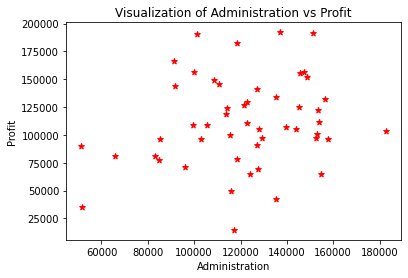

In [173]:
plt.xlabel("Administration")
plt.ylabel("Profit")
plt.title("Visualization of Administration vs Profit")
plt.scatter(dataset["Administration"], dataset.Profit, color="red", marker="*")
plt.show()

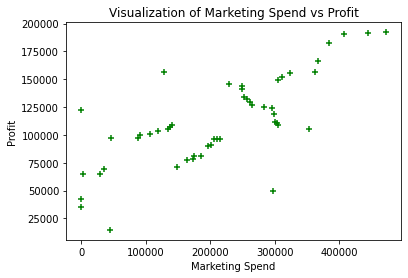

In [174]:
plt.xlabel("Marketing Spend")
plt.ylabel("Profit")
plt.title("Visualization of Marketing Spend vs Profit")
plt.scatter(dataset["Marketing Spend"], dataset.Profit, color="g", marker="+")
plt.show()

# Splitting of dataset into dependent and independent variables

In [175]:
x = dataset.drop(["State","Profit"], axis=1)
y = dataset["Profit"]

In [176]:
x.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [177]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

# Spliting of dataset into testing and training

In [178]:
import sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [179]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Prediction

In [180]:
y_pred_train = lm.predict(x_train)      #Actual = y_train
y_pred_test = lm.predict(x_test)        #Actual = y_test

# Equation

In [181]:
#y = p*x1 + q*x2 + r*x3 + b
print("Coeffecients(p,q,r): ", lm.coef_)
print("Intercept(b): ", lm.intercept_)

Coeffecients(p,q,r):  [ 0.7742023  -0.00877164  0.02934891]
Intercept(b):  49659.157733186345


In [182]:
#y = p*x1 + q*x2 + r*x3 + b
Y = (lm.coef_ * x_train)+ lm.intercept_
print("Equation is: \n", Y.head())

Equation is: 
         R&D Spend  Administration  Marketing Spend
32   98750.443069    48525.690146     51011.709813
39   79511.244911    48931.268914     54795.197294
21  110348.465807    48310.312936     58456.121945
36   71850.706690    48544.666707     55562.011654
19  116565.488353    48312.587597     49659.157733


# Performance

In [183]:
df = pd.DataFrame(y_pred_test, y_test)
df.head()

,0
Profit,
105008.31,114729.007682
96479.51,90569.032313
78239.91,75952.348616
81229.06,70179.811176
191050.39,179539.151879


# Accuracy

In [184]:
accuracy = metrics.r2_score(y_test, y_pred_test)    #Accuracy score
print("Accuracy score: ", accuracy)
print("Accuracy percent: ", round(accuracy*100,2), "%")

Accuracy score:  0.9650940934427324
Accuracy percent:  96.51 %


# Mean Square Error

In [185]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_test)
print("Mean Square Error:", mse)

Mean Square Error: 79195300.728072


# Visualization

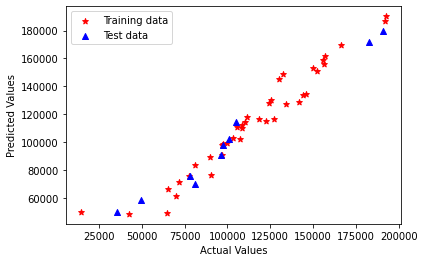

In [186]:
plt.scatter(y_train, y_pred_train, c='r', marker='*')
plt.scatter(y_test, y_pred_test, c='b', marker='^')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend(['Training data','Test data'])
plt.show()



---

